# **FIFA World Cup Analysis**

### Problem Statement:
With FIFA is in the blood of many people of the world. You are tasked to tell the story of unsung
analysts who put great efforts to provide accurate data to answer every question of fans. The
FIFA World Cup is a global football competition contested by the various football-playing
nations of the world. It is contested every four years and is the most prestigious and important
trophy in the sport of football.

The World Cups dataset shows all information about all the World Cups in history, while the
World Cup Matches dataset shows all the results from the matches contested as part of the
cups. Find key metrics and factors that influence the World Cup win. Do your own research
and come up with your findings.


---

Import Libraries And Datasets

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [2]:
WC_Matches = pd.read_csv('/content/drive/MyDrive/Datasets/FIFA_WC_Data/WorldCupMatches.csv')
WC_Players = pd.read_csv('/content/drive/MyDrive/Datasets/FIFA_WC_Data/WorldCupPlayers.csv')
WC = pd.read_csv('/content/drive/MyDrive/Datasets/FIFA_WC_Data/WorldCups.csv')

print(WC_Matches.shape, WC_Players.shape, WC.shape)

(4572, 20) (37784, 9) (20, 10)


In [3]:
WC_Matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [4]:
WC_Players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [5]:
WC.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


Columns name of each dataset

In [6]:
print('WC_Matches Columns: ', WC_Matches.columns, '\n')
print('WC_Players Columns: ', WC_Players.columns, '\n')
print('WC Columns: ', WC.columns)

WC_Matches Columns:  Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object') 

WC_Players Columns:  Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name', 'Position', 'Event'],
      dtype='object') 

WC Columns:  Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')


Check for null values in each dataset

In [7]:
print('WC_Matches null values: \n',WC_Matches.isnull().sum(), '\n')
print('WC_Players null values: \n',WC_Players.isnull().sum(), '\n')
print('WC null values: \n',WC.isnull().sum())

WC_Matches null values: 
 Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64 

WC_Players null values: 
 RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64 

WC null values: 
 Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth       

Checking Duplicate data in each dataset

In [8]:
print('WC_Matches Duplicate data: ', WC_Matches.duplicated().sum())
print('WC_Players Duplicate data: ', WC_Players.duplicated().sum())
print('WC Duplicate data: ', WC.duplicated().sum())

WC_Matches Duplicate data:  3735
WC_Players Duplicate data:  736
WC Duplicate data:  0


Drop Duplicate data from each dataset

In [9]:
WC_Matches.drop_duplicates(inplace=True)
WC_Players.drop_duplicates(inplace=True)
WC.drop_duplicates(inplace=True)

print('WC_Matches Duplicate data: ', WC_Matches.duplicated().sum())
print('WC_Players Duplicate data: ', WC_Players.duplicated().sum())
print('WC Duplicate data: ', WC.duplicated().sum())

WC_Matches Duplicate data:  0
WC_Players Duplicate data:  0
WC Duplicate data:  0


# **Exploratory Data Analysis**

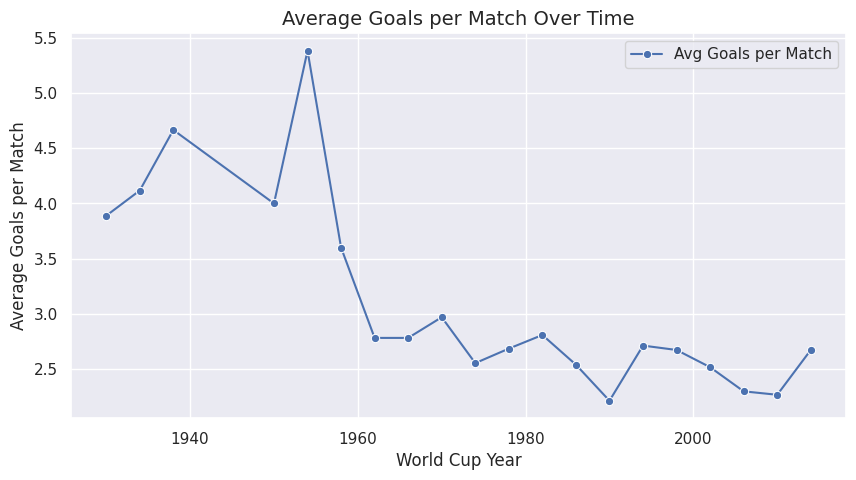

In [47]:
# Calculate average goals per match for each World Cup
avg_goals_per_cup = WC_Matches.groupby('Year')[['Home Team Goals', 'Away Team Goals']].sum().sum(axis=1) / WC_Matches.groupby('Year')['MatchID'].count()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_goals_per_cup.index, y=avg_goals_per_cup.values, marker='o', palette='crest')
plt.title('Average Goals per Match Over Time', fontsize=14)
plt.xlabel('World Cup Year')
plt.ylabel('Average Goals per Match')
plt.legend(labels=['Avg Goals per Match'])
plt.grid(True)
plt.show()

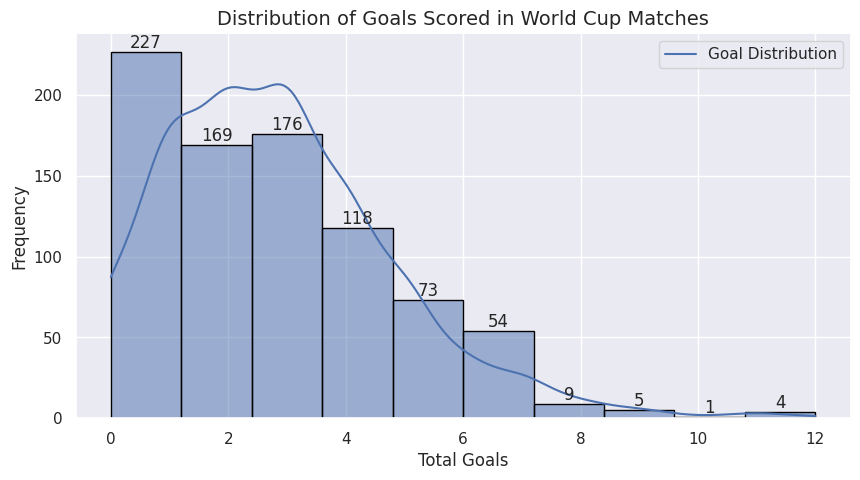

In [57]:
# Combine home and away goals into a single column
WC_Matches['Total Goals'] = WC_Matches['Home Team Goals'] + WC_Matches['Away Team Goals']

# Create the histogram for all World Cup matches
plt.figure(figsize=(10, 5))
ax = sns.histplot(WC_Matches['Total Goals'], bins=10, kde=True, palette='crest', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Goals Scored in World Cup Matches', fontsize=14)
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.legend(labels=['Goal Distribution'])
plt.grid(True)
plt.show()

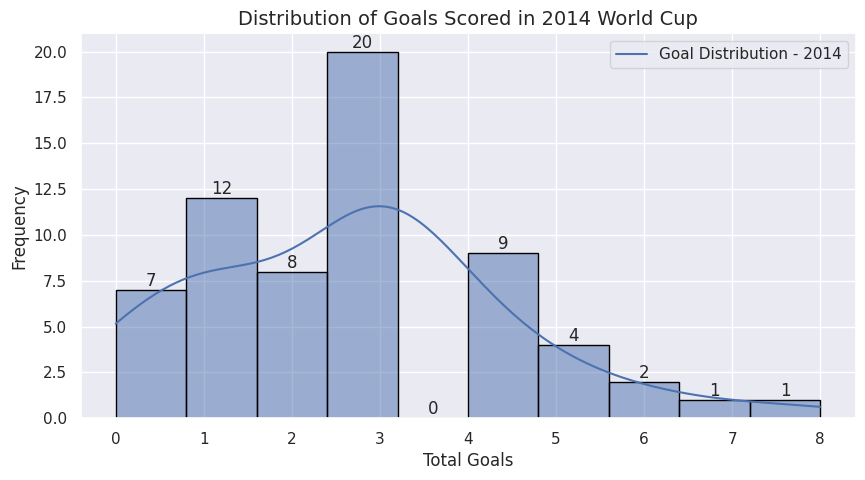

In [58]:
# Distribution of goals scored for a specific World Cup (e.g., 2014)
year = 2014
specific_year_matches = WC_Matches[WC_Matches['Year'] == year]

plt.figure(figsize=(10, 5))
ax = sns.histplot(specific_year_matches['Total Goals'], bins=10, kde=True, palette='crest', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container)
plt.title(f'Distribution of Goals Scored in {year} World Cup', fontsize=14)
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.legend(labels=[f'Goal Distribution - {year}'])
plt.grid(True)
plt.show()

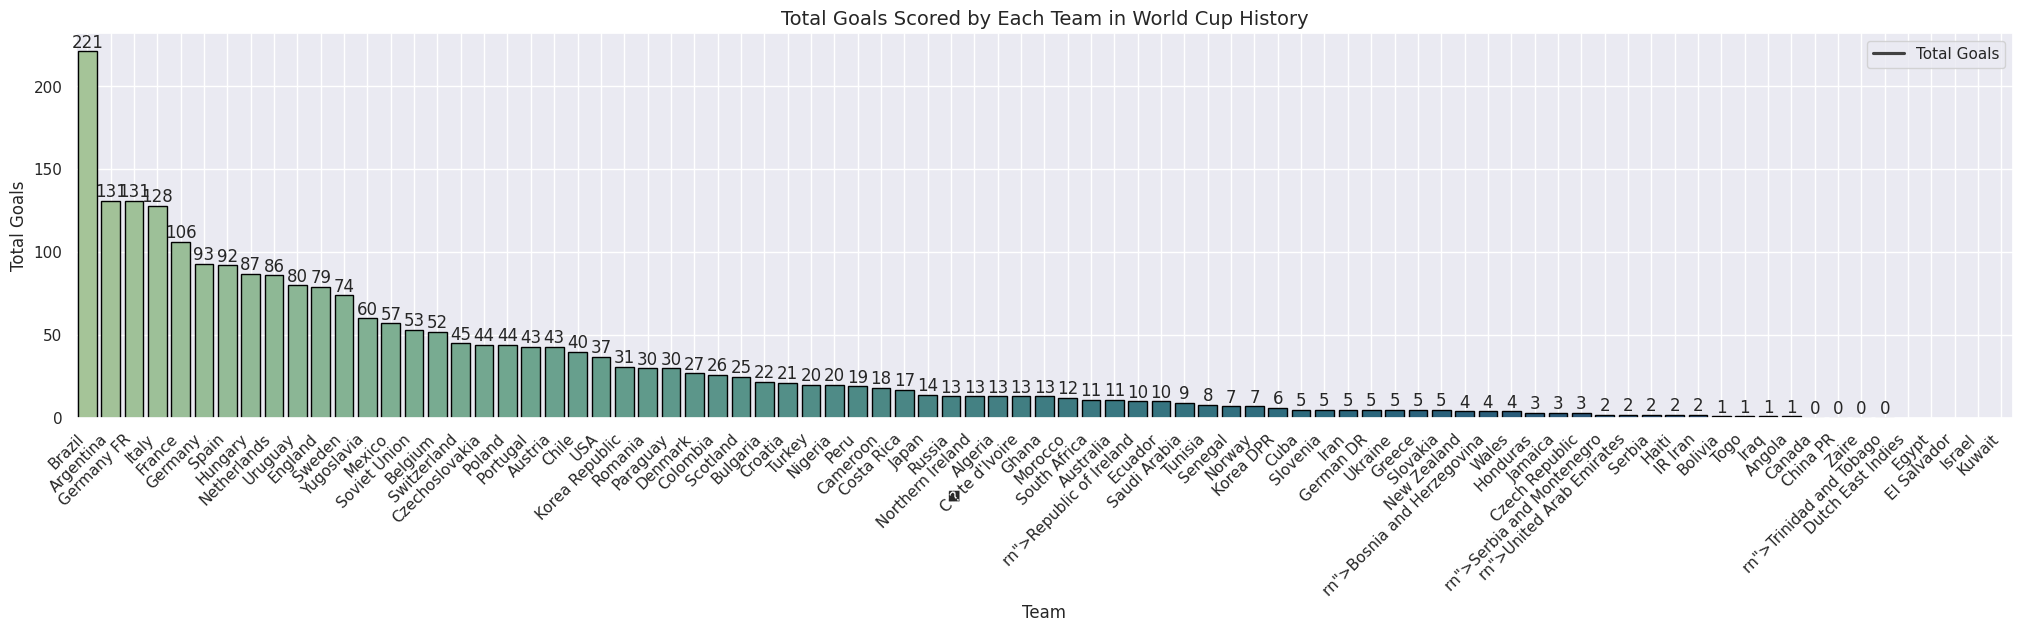

In [61]:
# Calculate total goals per team
team_goals = (WC_Matches.groupby('Home Team Name')['Home Team Goals'].sum() +
              WC_Matches.groupby('Away Team Name')['Away Team Goals'].sum()).sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(25, 5))
ax = sns.barplot(x=team_goals.index, y=team_goals.values, palette='crest', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Total Goals Scored by Each Team in World Cup History', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=45, ha='right')
plt.legend(labels=['Total Goals'])
plt.grid(True)
plt.show()

<Figure size 1500x600 with 0 Axes>

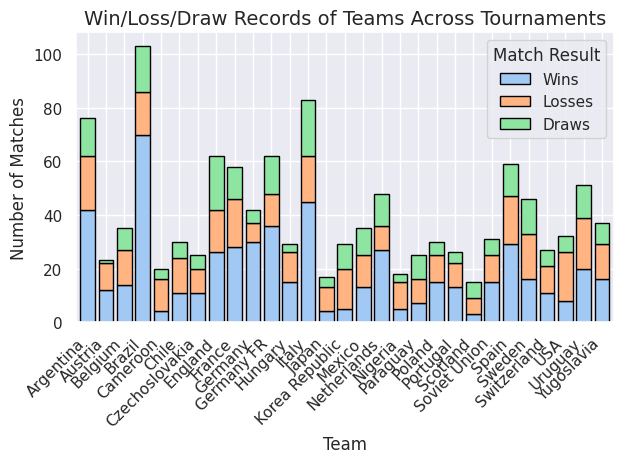

In [56]:
# Create a list to store the records for each team and year.
team_records_data = []

for year in WC_Matches['Year'].unique():
    year_matches = WC_Matches[WC_Matches['Year'] == year]
    for team in year_matches['Home Team Name'].unique():
        wins = len(year_matches[(year_matches['Home Team Name'] == team) & (year_matches['Home Team Goals'] > year_matches['Away Team Goals'])]) + \
               len(year_matches[(year_matches['Away Team Name'] == team) & (year_matches['Away Team Goals'] > year_matches['Home Team Goals'])])
        losses = len(year_matches[(year_matches['Home Team Name'] == team) & (year_matches['Home Team Goals'] < year_matches['Away Team Goals'])]) + \
                 len(year_matches[(year_matches['Away Team Name'] == team) & (year_matches['Away Team Goals'] < year_matches['Home Team Goals'])])
        draws = len(year_matches[(year_matches['Home Team Name'] == team) & (year_matches['Home Team Goals'] == year_matches['Away Team Goals'])]) + \
                len(year_matches[(year_matches['Away Team Name'] == team) & (year_matches['Away Team Goals'] == year_matches['Home Team Goals'])])
        # Append a dictionary for the current team's record to the list.
        team_records_data.append({'Team': team, 'Year': year, 'Wins': wins, 'Losses': losses, 'Draws': draws})

# Create the DataFrame from the list.
team_records = pd.DataFrame(team_records_data)

# Select teams with significant number of matches
teams_to_plot = team_records['Team'].value_counts()[team_records['Team'].value_counts() >= 5].index

# Create a smaller dataframe containing only those teams
team_records_filtered = team_records[team_records['Team'].isin(teams_to_plot)]

# Aggregate wins, losses, and draws per team
team_records_agg = team_records_filtered.groupby('Team')[['Wins', 'Losses', 'Draws']].sum()

# Create the stacked bar chart
plt.figure(figsize=(15, 6))
team_records_agg.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"), width=0.8, edgecolor='black')
plt.title('Win/Loss/Draw Records of Teams Across Tournaments', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Match Result', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

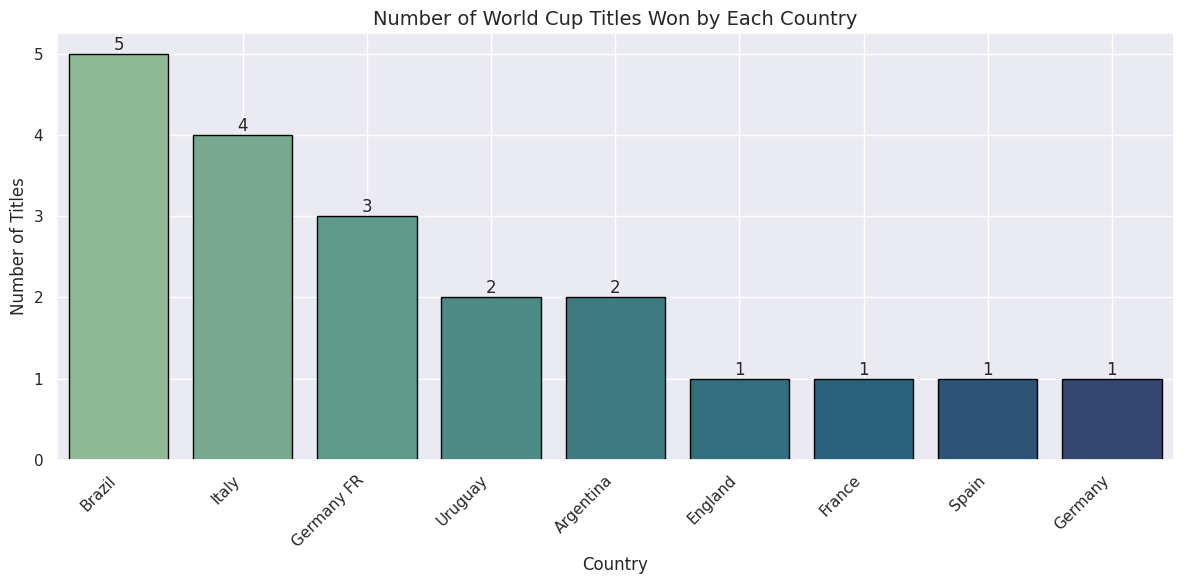

In [63]:
# Count the number of wins per country
title_counts = WC['Winner'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=title_counts.index, y=title_counts.values, palette='crest', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of World Cup Titles Won by Each Country', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

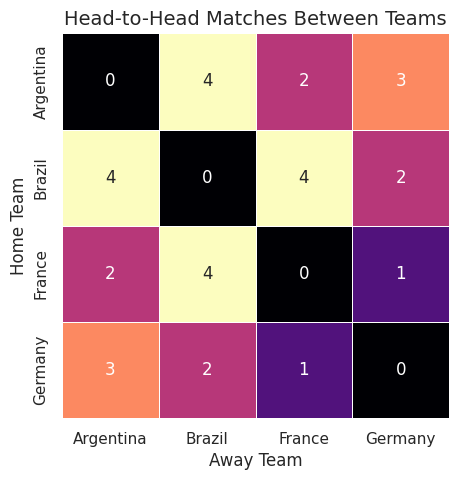

In [64]:
# Select teams for head-to-head analysis
teams_to_compare = ['Brazil', 'Germany', 'Argentina', 'France']

# Filter matches involving the selected teams
head_to_head_matches = WC_Matches[
    WC_Matches['Home Team Name'].isin(teams_to_compare) & WC_Matches['Away Team Name'].isin(teams_to_compare)
]

# Count total matches played between each team
head_to_head_counts = head_to_head_matches.pivot_table(
    index='Home Team Name', columns='Away Team Name', values='MatchID', aggfunc='count', fill_value=0
)

# Make the matrix symmetrical by adding home & away results
head_to_head_matrix = head_to_head_counts.add(head_to_head_counts.T, fill_value=0)

# Plot the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(head_to_head_matrix, annot=True, cmap='magma', fmt='d', linewidths=.5, cbar=False)
plt.title('Head-to-Head Matches Between Teams', fontsize=14)
plt.xlabel('Away Team')
plt.ylabel('Home Team')
plt.show()

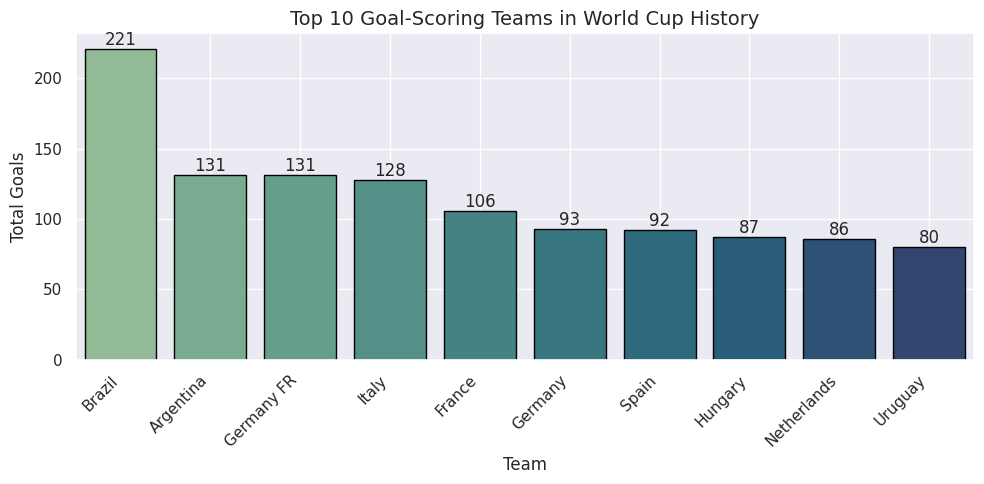

In [66]:
# Aggregate goals for both home and away teams
home_goals = WC_Matches.groupby('Home Team Name')['Home Team Goals'].sum()
away_goals = WC_Matches.groupby('Away Team Name')['Away Team Goals'].sum()

# Merge both into total goals per team
total_goals = home_goals.add(away_goals, fill_value=0)

# Get top 10 goal-scoring teams
top_10_teams = total_goals.sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_10_teams.index, y=top_10_teams.values, palette='crest', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 Goal-Scoring Teams in World Cup History', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

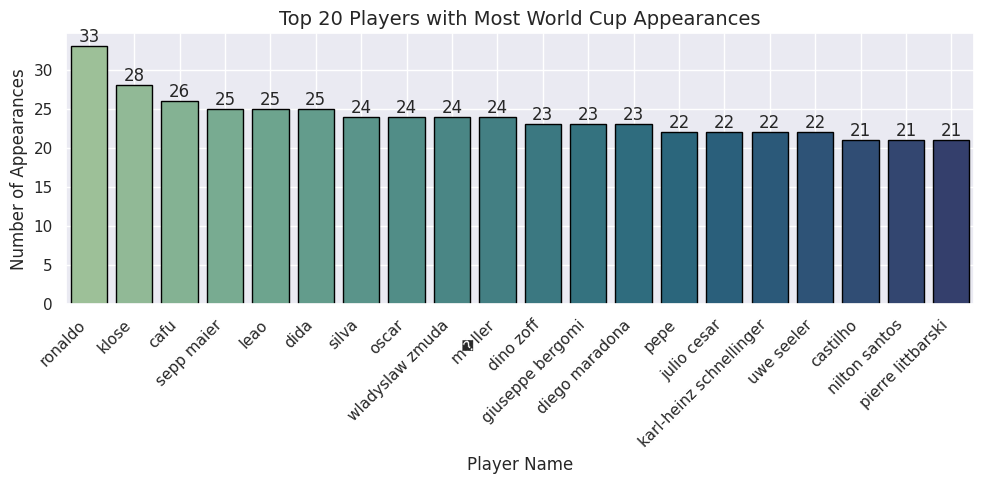

In [67]:
# Normalize player names to avoid duplication due to formatting differences
WC_Players['Player Name'] = WC_Players['Player Name'].str.strip().str.lower()

# Count player appearances
player_appearances = WC_Players['Player Name'].value_counts()

# Select the top N players
top_n_players = 20
top_players = player_appearances.head(top_n_players)

# Plot the bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_players.index, y=top_players.values, palette='crest', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container)
plt.title(f'Top {top_n_players} Players with Most World Cup Appearances', fontsize=14)
plt.xlabel('Player Name')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

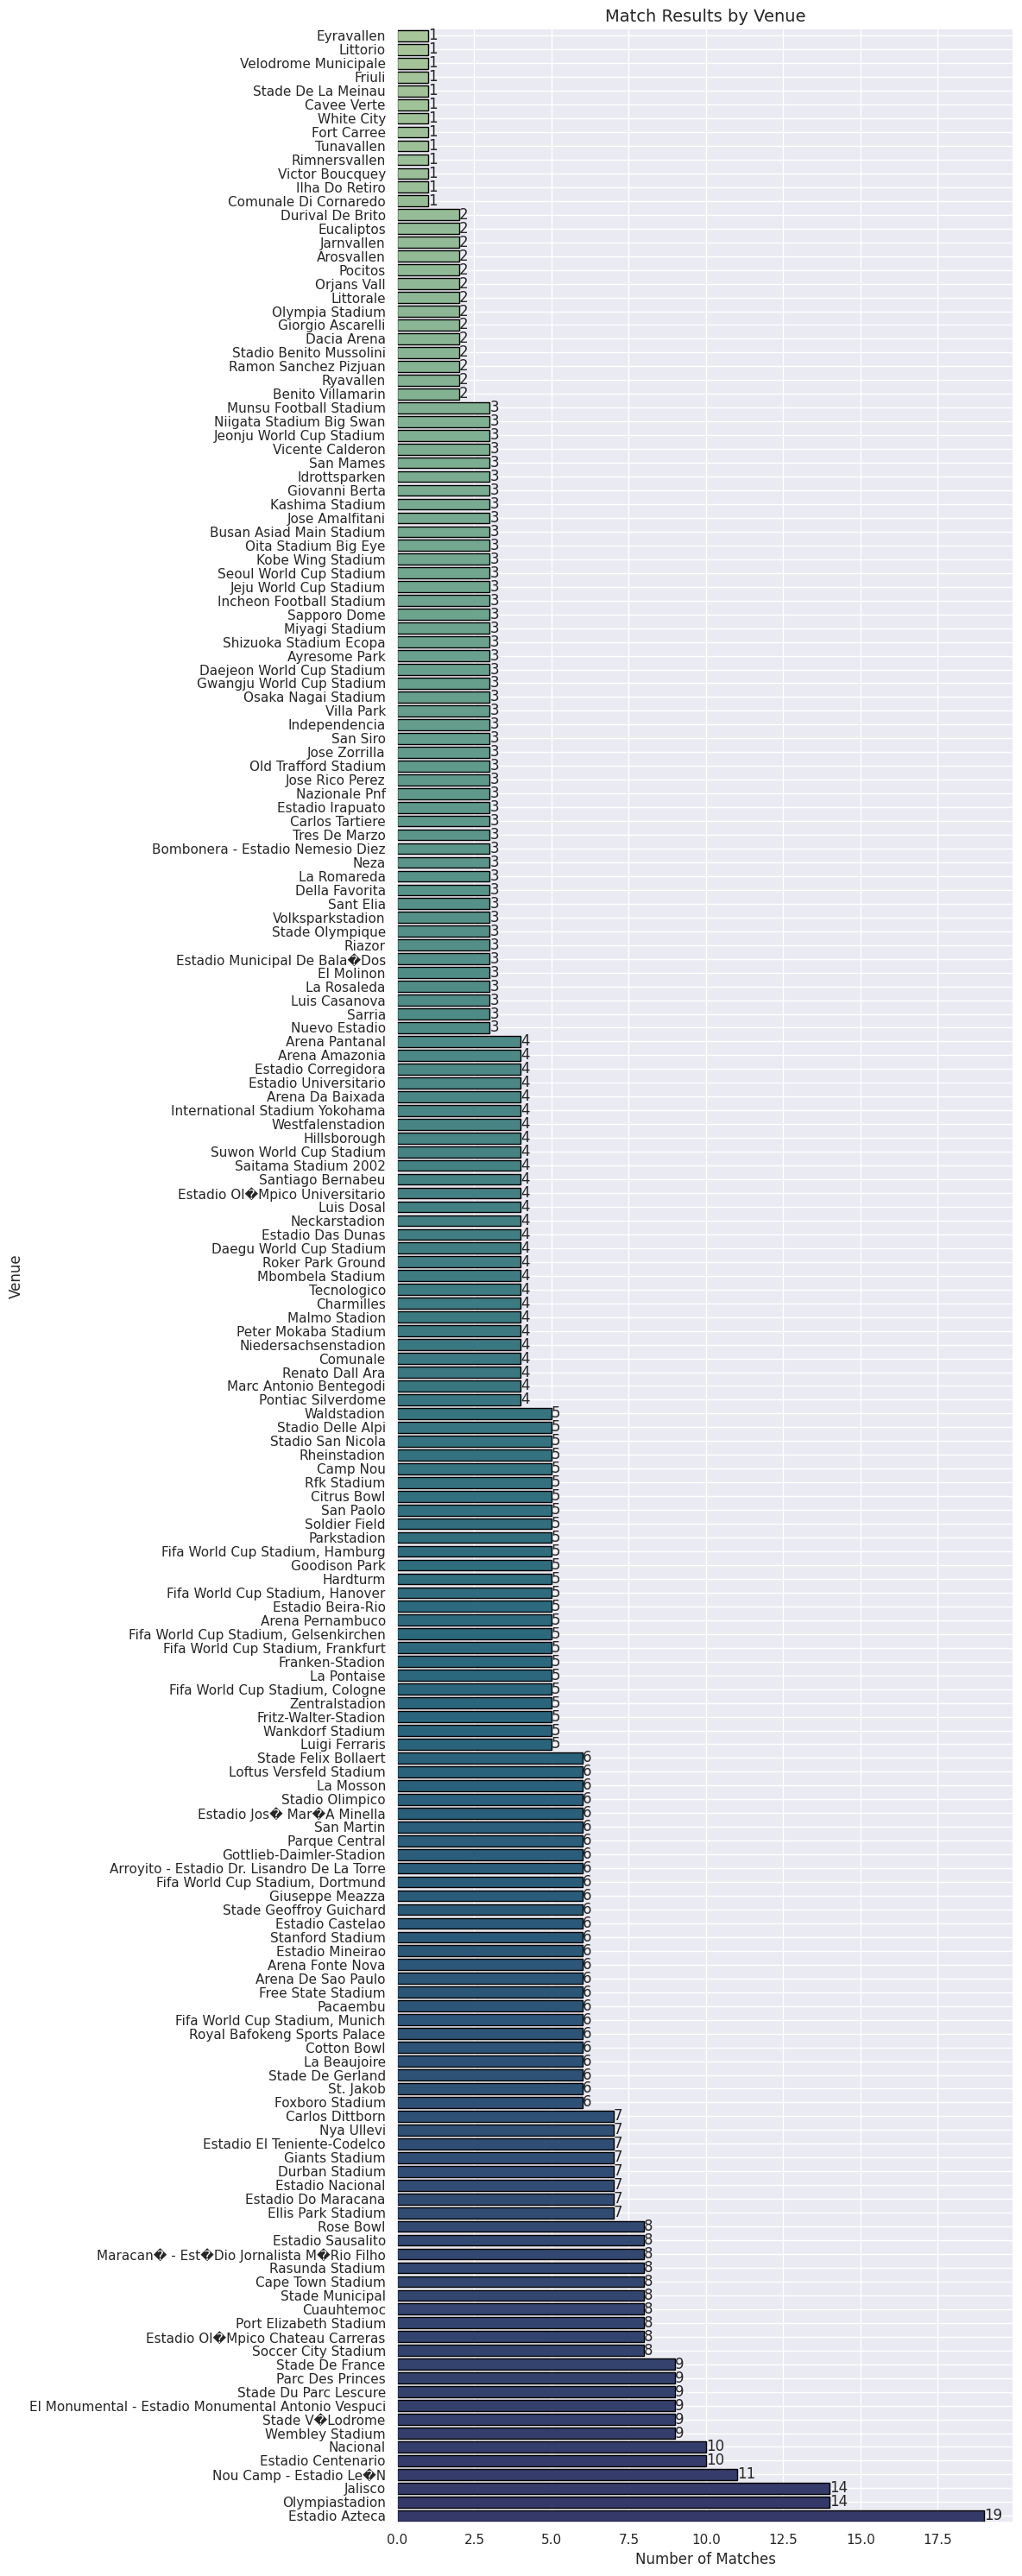

In [69]:
# Standardize venue names
WC_Matches['Stadium'] = WC_Matches['Stadium'].str.strip().str.title()

# Count matches per venue
venue_outcomes = WC_Matches['Stadium'].value_counts().reset_index()
venue_outcomes.columns = ['Venue', 'Match Count']

# Sort venues by match count
venue_outcomes = venue_outcomes.sort_values(by='Match Count', ascending=True)  # Ascending for horizontal bar chart

# Plot
plt.figure(figsize=(12, 30))
ax = sns.barplot(y='Venue', x='Match Count', data=venue_outcomes, palette='crest', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Match Results by Venue', fontsize=14)
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.grid(True)
plt.tight_layout()
plt.show()

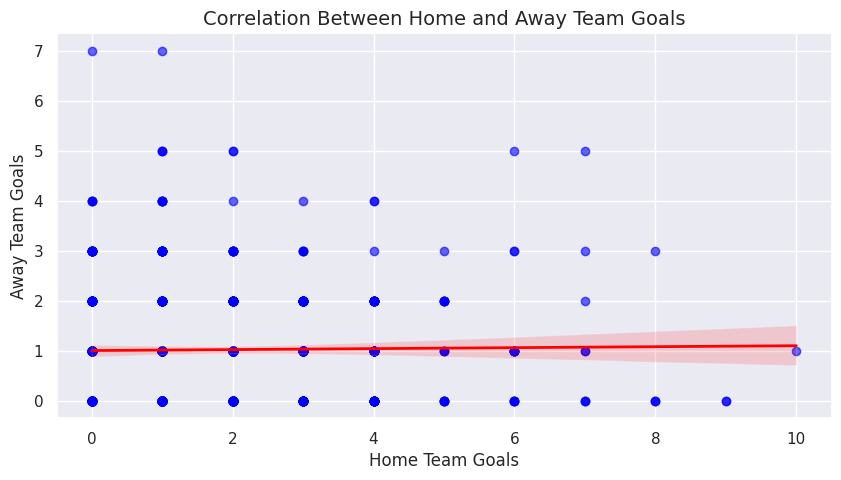

In [71]:
# Create scatter plot with trend line
plt.figure(figsize=(10, 5))
sns.regplot(
    x='Home Team Goals', y='Away Team Goals', data=WC_Matches,
    scatter_kws={'alpha': 0.6, 'color': 'blue'},  # Adjust alpha for visibility
    line_kws={'color': 'red', 'linewidth': 2}  # Make trend line prominent
)

# Titles and labels
plt.title('Correlation Between Home and Away Team Goals', fontsize=14)
plt.xlabel('Home Team Goals')
plt.ylabel('Away Team Goals')
plt.grid(True)
plt.show()

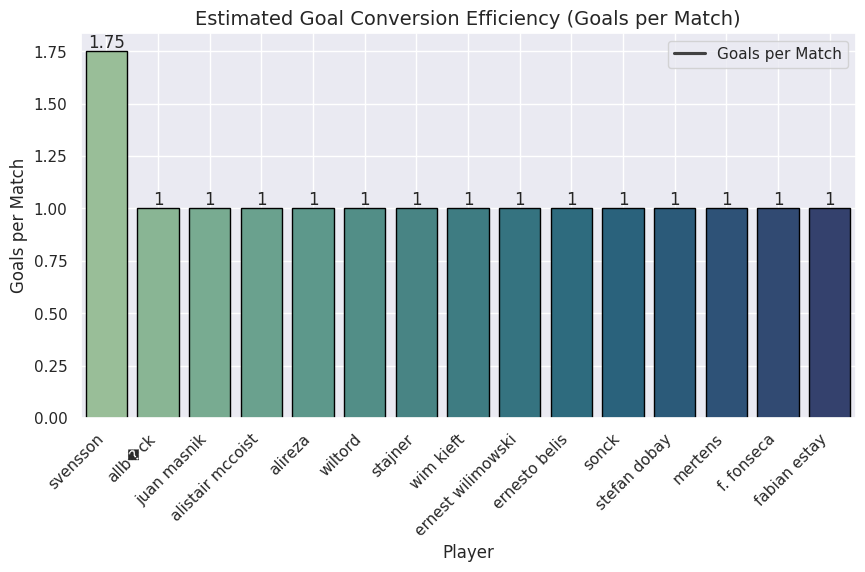

In [73]:
# Count goals scored per player
player_goals = WC_Players.groupby('Player Name')['Event'].count()

# Count number of matches played per player
player_matches = WC_Players.groupby('Player Name')['MatchID'].nunique()

# Estimate goal conversion efficiency
goal_conversion = (player_goals / player_matches).dropna().sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=goal_conversion.index, y=goal_conversion.values, palette='crest', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Estimated Goal Conversion Efficiency (Goals per Match)', fontsize=14)
plt.xlabel('Player')
plt.ylabel('Goals per Match')
plt.xticks(rotation=45, ha='right')
plt.legend(labels=['Goals per Match'])
plt.grid(True)
plt.show()

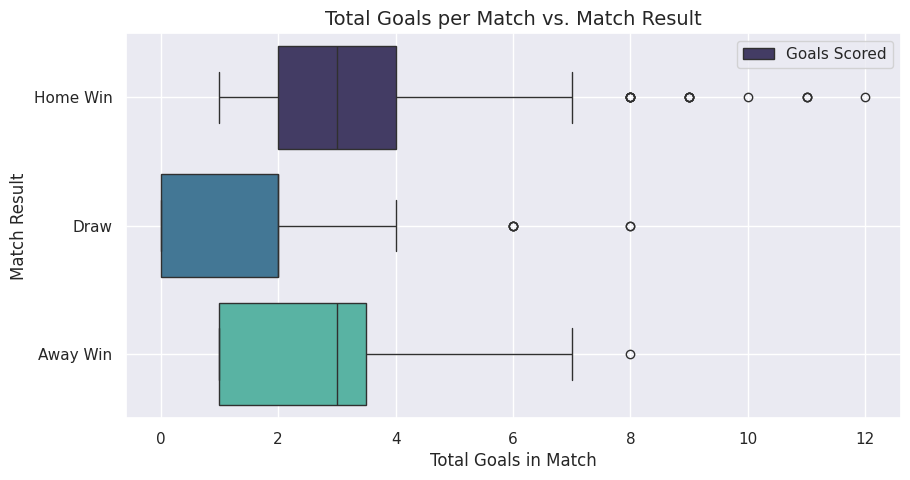

In [74]:
# Determine match result
def get_match_result(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        return 'Home Win'
    elif row['Home Team Goals'] < row['Away Team Goals']:
        return 'Away Win'
    else:
        return 'Draw'

WC_Matches['Match Result'] = WC_Matches.apply(get_match_result, axis=1)

plt.figure(figsize=(10, 5))
sns.boxplot(x=WC_Matches['Home Team Goals'] + WC_Matches['Away Team Goals'],
            y=WC_Matches['Match Result'], palette='mako')
plt.title('Total Goals per Match vs. Match Result', fontsize=14)
plt.xlabel('Total Goals in Match')
plt.ylabel('Match Result')
plt.legend(labels=['Goals Scored'])
plt.grid(True)
plt.show()

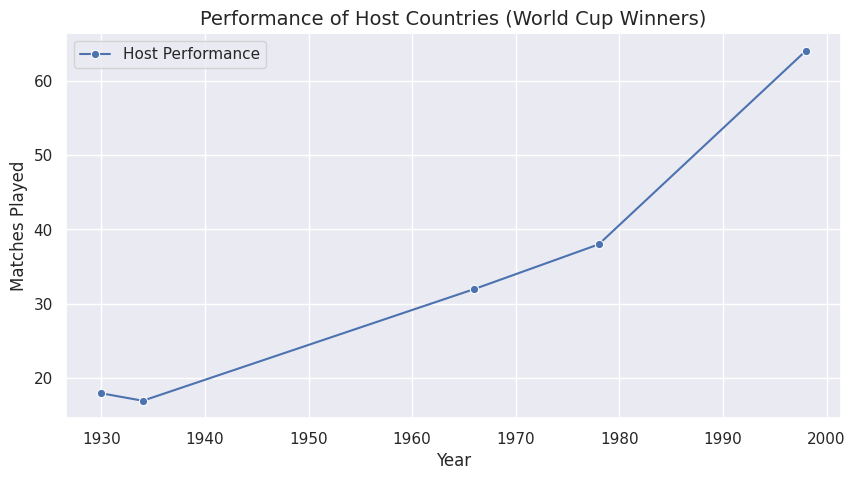

In [75]:
host_performance = WC[WC['Country'] == WC['Winner']]

plt.figure(figsize=(10, 5))
sns.lineplot(x=host_performance['Year'], y=host_performance['MatchesPlayed'], marker='o', palette='crest')
plt.title('Performance of Host Countries (World Cup Winners)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Matches Played')
plt.legend(labels=['Host Performance'])
plt.grid(True)
plt.show()

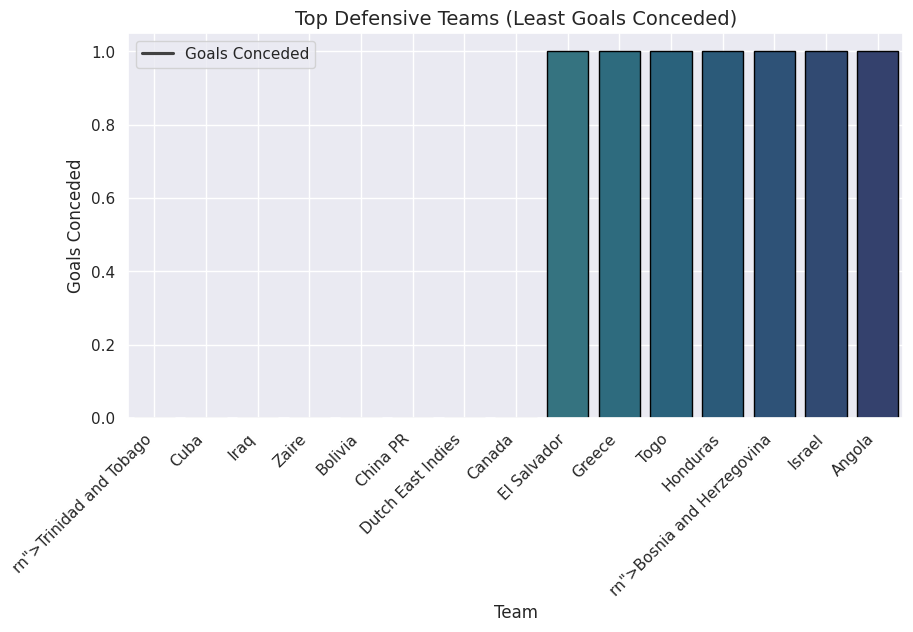

In [76]:
# Calculate total goals conceded per team
goals_conceded = WC_Matches.groupby('Away Team Name')['Away Team Goals'].sum().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=goals_conceded.head(15).index, y=goals_conceded.head(15).values, palette='crest', edgecolor='black')
plt.title('Top Defensive Teams (Least Goals Conceded)', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')
plt.legend(labels=['Goals Conceded'])
plt.grid(True)
plt.show()

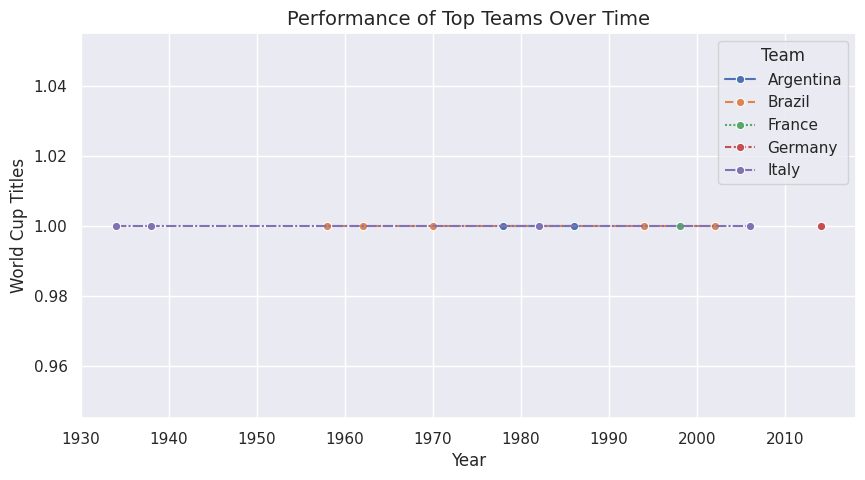

In [77]:
top_teams = ['Brazil', 'Germany', 'Argentina', 'France', 'Italy']
team_performance = WC[WC['Winner'].isin(top_teams)].groupby(['Year', 'Winner']).size().unstack()

plt.figure(figsize=(10, 5))
sns.lineplot(data=team_performance, marker='o', palette='deep')
plt.title('Performance of Top Teams Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('World Cup Titles')
plt.legend(title='Team')
plt.grid(True)
plt.show()

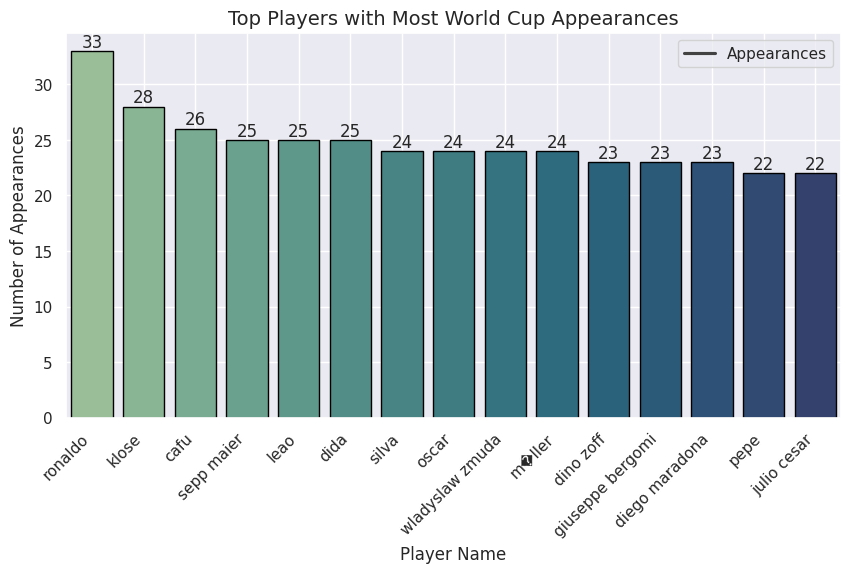

In [79]:
# Count player appearances
player_appearances = WC_Players['Player Name'].value_counts()

top_players = player_appearances.head(15)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_players.index, y=top_players.values, palette='crest', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top Players with Most World Cup Appearances', fontsize=14)
plt.xlabel('Player Name')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.legend(labels=['Appearances'])
plt.grid(True)
plt.show()

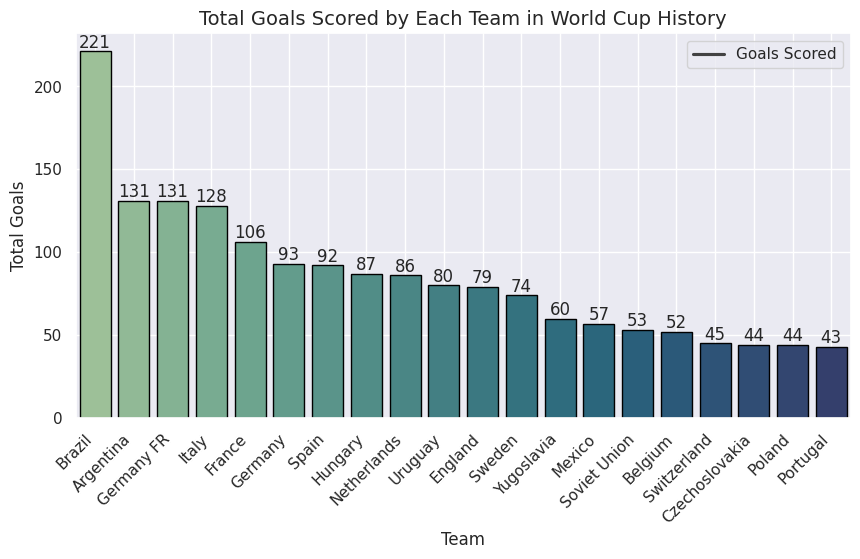

In [80]:
# Calculate total goals per team
team_goals = (WC_Matches.groupby('Home Team Name')['Home Team Goals'].sum() +
              WC_Matches.groupby('Away Team Name')['Away Team Goals'].sum()).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=team_goals.head(20).index, y=team_goals.head(20).values, palette='crest', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Total Goals Scored by Each Team in World Cup History', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=45, ha='right')
plt.legend(labels=['Goals Scored'])
plt.grid(True)
plt.show()

# **Thank You**